# Multiple Linear Regression - Diabetes Dataset

### Objective
The purpose is to construct, evaluate model performance, interprete coefficients, and diagnose potential issues such as multicollinearity of linear regression models.

## 1. F-statistic in Regression Analysis
The F-statistic is used to test the overall significance of a regression model. It compares the fit of
the proposed model against a model with no predictors (only the intercept). Specifically, it tests the
null hypothesis that all regression coefficients are equal to zero (i.e., the model has no explanatory
power).

#### Interpretation of the F-statistic
  - **Null Hypothesis (H0):** All the regression coefficients are zero (the model is not better than a
simple mean).
  - **Alternative Hypothesis (H1):** At least one of the regression coefficients is not zero (the
model has some explanatory power).
A high F-statistic value indicates that the model provides a better fit to the data than the model with
no predictors.

## 2. Multicollinearity
**Multicollinearity** occurs when two or more independent variables in a regression model are highly
correlated. This means that one variable can be linearly predicted from the others with a substantial
degree of accuracy. Multicollinearity can cause several issues:
1. **Inflated Standard Errors:** High multicollinearity inflates the standard errors of the
coefficients, making it difficult to determine the individual effect of each independent
variable.
2. **Unstable Estimates:** Coefficient estimates become very sensitive to changes in the model.
Small changes in the data can lead to large changes in the model.
3. **Interpretation Difficulty:** It becomes challenging to assess the impact of each predictor on
the dependent variable because they are not independent.

#### Checking for Multicollinearity

One common method to check for multicollinearity is by calculating the Variance Inflation Factor
(VIF) for each predictor. The VIF measures how much the variance of a regression coefficient is
inflated due to multicollinearity. A VIF value greater than 5-10 indicates a problematic amount of
multicollinearity.

#### Interpreting VIF Values
- **VIF = 1:** No correlation between the independent variable and any others.
- **1 < VIF < 5:** Moderate correlation, typically not a cause for concern.
- **VIF > 5:** Potentially problematic multicollinearity, requires further investigation.
- **VIF > 10:** Indicates significant multicollinearity, which needs to be addressed.

By evaluating the VIF values, you can determine whether multicollinearity is a problem in your
regression model and take appropriate steps if needed.
To understand which variables are highly correlated and contributing to multicollinearity,
you can examine the correlation matrix of the independent variables. The correlation matrix shows
the pairwise correlation coefficients between all variables, which can help you identify pairs of
variables that have high correlations.

## 3. Tasks
#### 1. Write a regression equation

The regression equation can be written as follows:

$$ \text{target} = 152.1335 + 115.3983 \cdot \text{age} + 94.6494 \cdot \text{s2} + 556.8984 \cdot \text{s6} $$

#### 2. Is the hypothesis of significance of the whole model accepted (F-statistic)?

The null hypothesis for the F-test is that all regression coefficients are equal to zero (i.e., the model has no explanatory power). The alternative hypothesis is that at least one of the regression coefficients is not zero.

- **F-statistic**: 26.81
- **Prob (F-statistic)**: 6.17e-16

Since the p-value associated with the F-statistic is much smaller than 0.05, we reject the null hypothesis. This indicates that the model as a whole is statistically significant.

#### 3. What is the coefficient of determination R2 and how can this be interpreted?

- **R-squared (R2)**: 0.155

The R-squared value of 0.155 indicates that approximately 15.5% of the variability in the target variable (disease progression) is explained by the independent variables (age, s2, s6) in the model. This suggests that the model has limited explanatory power.

#### 4. Which of the coefficients of the model are significant (Results of Significance Test for the Regression Coefficients)?

To determine if a coefficient is significant, we look at the p-value for each coefficient:

- **Intercept (const)**: p-value = 0.000 (significant)
- **age**: p-value = 0.126 (not significant)
- **s2**: p-value = 0.208 (not significant)
- **s6**: p-value = 0.000 (significant)

Only the coefficient for `s6` is statistically significant at the 0.05 level.

#### 5. Interpret multicollinearity test results (VIF, Condition Number)

- **VIF values**:
  - const: 1.000
  - age: 1.124
  - s2: 1.115
  - s6: 1.168

All VIF values are below the threshold of 5, indicating that multicollinearity is not a concern in this model.

- **Condition Number**: 25.6

The Condition Number is below 30, suggesting that multicollinearity is not a significant issue.

#### 6. Which variables have a strong correlation?

The correlation matrix shows the following pairwise correlations:

- **age and s2**: 0.219
- **age and s6**: 0.302
- **s2 and s6**: 0.291

None of the correlations are particularly strong, as all values are below 0.5. This further supports the finding that multicollinearity is not a major concern.

#### 7. Are the model errors normally distributed?

- **Jarque-Bera Test**:
  - JB Statistic: 18.818
  - p-value: 8.20e-05

Since the p-value is less than 0.05, we reject the null hypothesis of the Jarque-Bera test. This indicates that the residuals do not follow a normal distribution, suggesting that there might be some systematic errors in the model that have not been accounted for.

#### 8. Has the regression equation changed after information about the quality of the model?

The regression equation itself does not change based on the quality metrics; it remains the same:

$$ \text{target} = 152.1335 + 115.3983 \cdot \text{age} + 94.6494 \cdot \text{s2} + 556.8984 \cdot \text{s6} $$

However, the quality metrics (such as R-squared, p-values, VIF, and the Jarque-Bera test) provide insights into the reliability and validity of the regression equation. Based on these insights, you might decide to make changes to improve the model, such as including additional variables, transforming existing variables, or addressing issues like non-normality of residuals.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
### Load the Diabetes dataset

diabetes = load_diabetes()

In [3]:
### Convert the dataset to a DataFrame

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [4]:
### Select features number 0, 5, and 9

selected_features = ['age', 's2', 's6']

In [5]:
### Define independent and dependent variables

X = df[selected_features]
y = df['target']

In [6]:
### Add a constant to the model (intercept)

X = sm.add_constant(X)

In [7]:
### Build the multiple linear regression model

model = sm.OLS(y, X).fit()

In [8]:
### Print the model summary

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     26.81
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           6.17e-16
Time:                        13:24:38   Log-Likelihood:                -2509.9
No. Observations:                 442   AIC:                             5028.
Df Residuals:                     438   BIC:                             5044.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      3.382     44.983      0.0

In [9]:
### Print the first 10 values of the dataset

print("First 10 rows of the dataset:")
X.join(y).drop(columns=["const"]).head(10)

First 10 rows of the dataset:


,age,s2,s6,target
0,0.038076,-0.034821,-0.017646,151.0
1,-0.001882,-0.019163,-0.092204,75.0
2,0.085299,-0.034194,-0.025930,141.0
3,-0.089063,0.024991,-0.009362,206.0
4,0.005383,0.015596,-0.046641,135.0
5,-0.092695,-0.079288,-0.096346,97.0
6,-0.045472,-0.024800,-0.038357,138.0
7,0.063504,0.108914,0.003064,63.0
8,0.041708,0.006202,0.011349,110.0
9,-0.070900,-0.034508,-0.013504,310.0


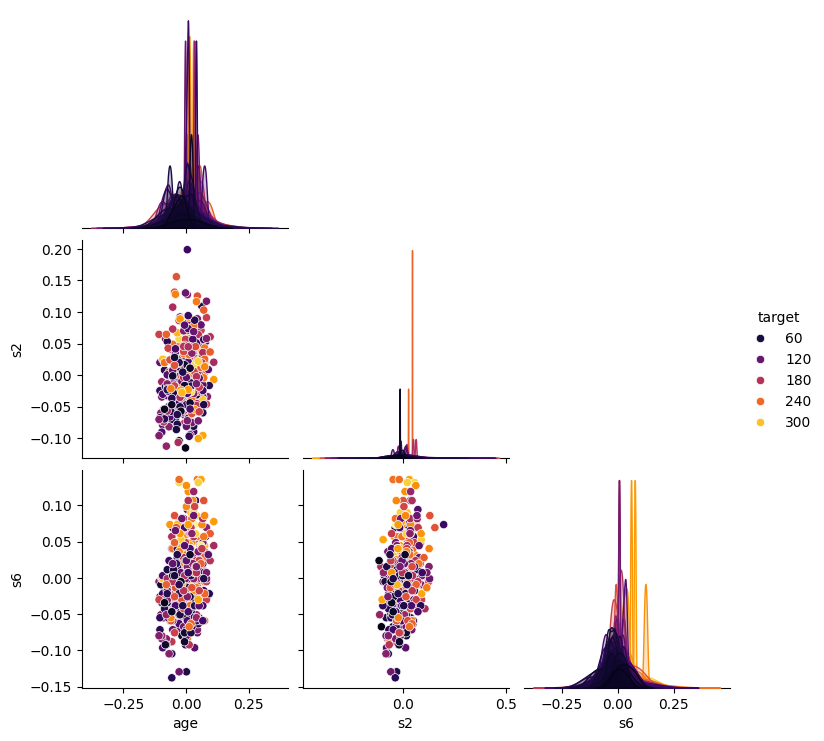

In [10]:
### Plot pairplots

sns.pairplot(df[['age', 's2', 's6', 'target']], hue ='target', palette="inferno", corner=True)
plt.show()

In [11]:
### Check for multicollinearity using VIF

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factors:")
vif_data

Variance Inflation Factors:


,Feature,VIF
0,const,1.000000
1,age,1.123527
2,s2,1.115437
3,s6,1.168173


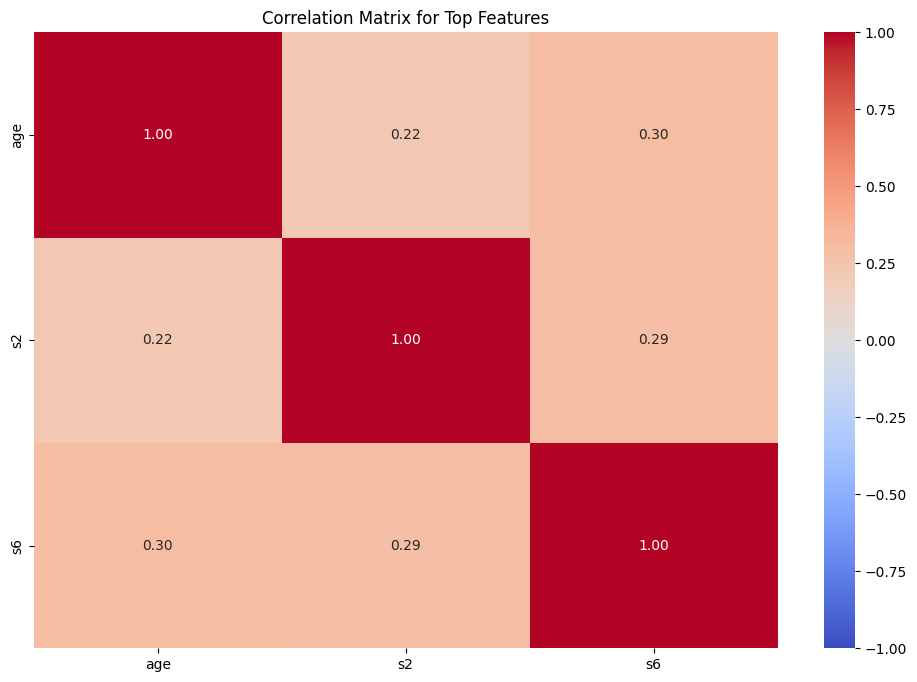

In [12]:
# 11. Build a correlation matrix to identify highly correlated variables
correlation_matrix = df[selected_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Top Features')
plt.show()